# Load Dataset

In [16]:
import pandas as pd

In [17]:
data = pd.read_csv("data/dataSet.csv")

In [18]:
data.shape

(9000, 2)

In [19]:
data.head()

,Comment,Label
0,"মুভির ট্রেলার দেখে ভালোই লেগেছে, তবে কিছু কিছু...",2.0
1,"কিছু দৃশ্য খুব ভালো ছিল, কিন্তু চরিত্রগুলোর মধ...",2.0
2,"অভিনয় মোটামুটি ভালো, তবে প্রডাকশন ভীষণ ভালো হত...",2.0
3,"গল্পটা ঠিকঠাক, তবে কিছু জায়গায় লম্বা মনে হয়েছে।",2.0
4,"সুরের সাথে সাথে দৃশ্যগুলোও ভালো লেগেছে, তবে কি...",2.0


# Preparing & Splitting Data

In [20]:
data.isnull().sum()

Comment    0
Label      0
dtype: int64

In [21]:
data['Label'] = data['Label'].replace({0.0 : 'Negative', 1.0 : 'Positive', 2.0 : 'Neutral'})

In [22]:
data.head()

,Comment,Label
0,"মুভির ট্রেলার দেখে ভালোই লেগেছে, তবে কিছু কিছু...",Neutral
1,"কিছু দৃশ্য খুব ভালো ছিল, কিন্তু চরিত্রগুলোর মধ...",Neutral
2,"অভিনয় মোটামুটি ভালো, তবে প্রডাকশন ভীষণ ভালো হত...",Neutral
3,"গল্পটা ঠিকঠাক, তবে কিছু জায়গায় লম্বা মনে হয়েছে।",Neutral
4,"সুরের সাথে সাথে দৃশ্যগুলোও ভালো লেগেছে, তবে কি...",Neutral


In [23]:
X = data["Comment"]
y = data["Label"]

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_en = le.fit_transform(y)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_en, test_size=0.2, random_state=42)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vct = CountVectorizer()
X_train_vct = vct.fit_transform(X_train)
X_test_vct = vct.transform(X_test)

# Build Model

In [27]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_vct,y_train)
print(f'Accuracy : {model.score(X_train_vct,y_train):.3f}')

Accuracy : 0.810


# Hyperparameter Tuning

In [48]:
model = XGBClassifier(n_estimators=100)
model.fit(X_train_vct,y_train)
print(f'Accuracy : {model.score(X_train_vct,y_train):.3f}')

Accuracy : 0.810


In [56]:
model = XGBClassifier(n_estimators=180, use_label_encoder=True, eval_metric='logloss')
model.fit(X_train_vct,y_train)
print(f'Accuracy : {model.score(X_train_vct,y_train):.3f}')

Accuracy : 0.838


In [50]:
model = XGBClassifier(n_estimators=200, max_depth=18)
model.fit(X_train_vct,y_train)
print(f'Accuracy : {model.score(X_train_vct,y_train):.3f}')

Accuracy : 0.944


# Best Result 

In [57]:
model = XGBClassifier(n_estimators=200, max_depth=18, use_label_encoder=True, eval_metric='logloss')
model.fit(X_train_vct,y_train)
print(f'Accuracy : {model.score(X_train_vct,y_train):.3f}')

Accuracy : 0.944


In [52]:
prediction = model.predict(X_test_vct)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.64      0.62      0.63       613
           1       0.67      0.68      0.68       614
           2       0.71      0.72      0.72       573

    accuracy                           0.68      1800
   macro avg       0.68      0.68      0.68      1800
weighted avg       0.68      0.68      0.68      1800



In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

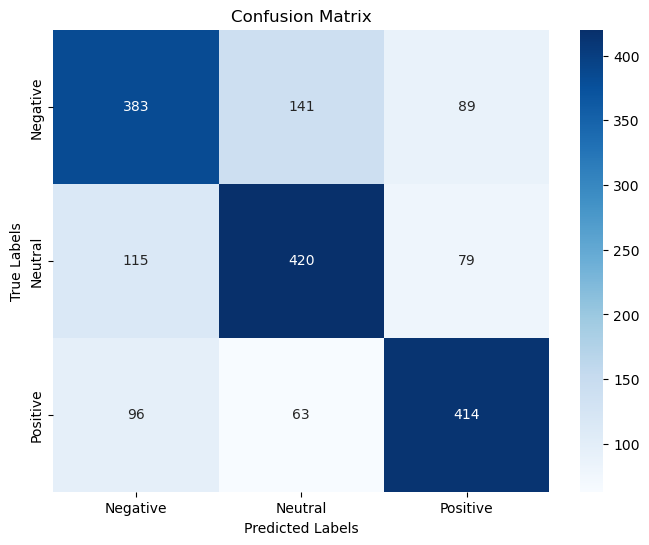

In [55]:
conf_matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()